Mai Xuan Bach

11200489

t-SNE: Exercise  2 & 3

# EX2.
Dùng thư viện sklearn, chạy lại với các dataset dưới, nhận xét khi thay đổi perplexity, https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


circles, perplexity=5 in 0.15 sec
circles, perplexity=30 in 0.29 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


circles, perplexity=50 in 0.31 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


circles, perplexity=100 in 0.31 sec
S-curve, perplexity=5 in 0.13 sec
S-curve, perplexity=30 in 0.29 sec
S-curve, perplexity=50 in 0.3 sec
S-curve, perplexity=100 in 0.31 sec
uniform grid, perplexity=5 in 0.16 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


uniform grid, perplexity=30 in 0.32 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


uniform grid, perplexity=50 in 0.34 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


uniform grid, perplexity=100 in 0.33 sec


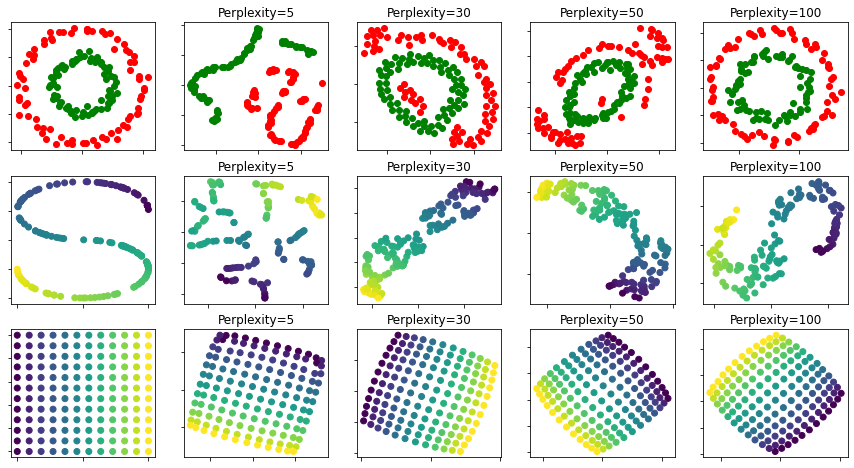

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()

**Nhận xét**
Hình dạng ngày càng rõ ràng hơn khi tăng perplexity.

Đối với hai hình tròn lồng nhau, perplexity = 50 có vẻ cho thấy sự phân cụm tốt nhất dù vẫn có một vài điểm màu đỏ bị lọt vào trong.

Đối với dữ liệu dạng chữ S, perplexity = 30 có vẻ cho thấy sự phân cụm rõ ràng.

Kích thước, khoảng cách và hình dạng các cụm thì đa dạng khác nhau và không đem lại nhiều ý nghĩa, không hẳn phụ thuộc vào perplexity. 

# 3.
Dùng word embedding (https://habr.com/en/company/vk/blog/449984/), chọn ra 10 từ bất kì, với mỗi từ tìm 10 từ có embedding gần nhất

a.	nhận xét về ngữ nghĩa các từ có embedding gần nhau

b.	dùng t-SNE giảm chiều các vector embedding về 2 chiều, nhận xét các cụm


## a.

In [2]:
import gensim
model_gn = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin', binary=True)


In [4]:
model_gn.most_similar("experience")

[('experiences', 0.6655040979385376),
 ('experi_ence', 0.624739944934845),
 ('expertise', 0.6086294651031494),
 ('expereince', 0.6052474975585938),
 ('experince', 0.5908307433128357),
 ('knowledge', 0.5741490721702576),
 ('experiece', 0.5550261735916138),
 ('experienced', 0.5294018983840942),
 ('exprience', 0.5235798954963684),
 ('ex_perience', 0.5171617269515991)]

In [5]:
model_gn["experience"]

array([ 3.78417969e-02, -6.00585938e-02, -5.81054688e-02, -1.53320312e-01,
        7.12890625e-02,  1.29882812e-01, -1.02050781e-01, -2.50000000e-01,
        3.08837891e-02, -5.12695312e-02,  1.06933594e-01,  6.25000000e-02,
       -4.54101562e-02, -1.52343750e-01,  7.93457031e-03,  1.88476562e-01,
        1.17187500e-01,  2.61718750e-01,  6.49414062e-02, -3.67187500e-01,
       -8.20312500e-02,  1.10351562e-01, -6.49414062e-02,  1.24511719e-01,
       -1.38549805e-02, -5.98144531e-02, -1.11328125e-01, -1.25000000e-01,
       -2.50000000e-01, -1.09863281e-01,  6.83593750e-02,  8.25195312e-02,
       -1.32812500e-01,  7.66601562e-02,  1.76757812e-01,  2.39257812e-02,
       -8.69140625e-02,  7.66601562e-02,  5.15136719e-02,  4.33349609e-03,
        1.27929688e-01,  3.11279297e-03, -9.76562500e-02,  1.05957031e-01,
       -6.00585938e-02, -2.03125000e-01, -2.61718750e-01,  2.10937500e-01,
       -8.10546875e-02, -2.31445312e-01, -7.42187500e-02,  1.37695312e-01,
       -1.25000000e-01,  

**model_gn.most_similar**

Find the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively.

This method **computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model**. The method corresponds to the word-analogy and distance scripts in the original word2vec implementation.

In [6]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'peace', 'war', 'food', 'expensive','financial']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_gn.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    print("word", word, "\n", "similar words", words)
    print("\n")
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

word Paris 
 similar words ['Parisian', 'Hopital_Europeen_Georges_Pompidou', 'Spyker_D##_Peking', 'France', 'Pantheon_Sorbonne', 'Aeroports_De', 'Grigny_south', 'Place_Denfert_Rochereau', 'guest_Olivier_Dolige', 'Lazard_Freres_Banque']


word Python 
 similar words ['Jython', 'Perl_Python', 'IronPython', 'scripting_languages', 'PHP_Perl', 'Java_Python', 'PHP', 'Python_Ruby', 'Visual_Basic', 'Perl']


word Sunday 
 similar words ['Saturday', 'Friday', 'Monday', 'Thursday', 'Wednesday', 'Tuesday', 'evening', 'afternoon', 'Thurday', 'Feb.']


word Tolstoy 
 similar words ['Leo_Tolstoy', 'writer_Leo_Tolstoy', 'Dostoevsky', 'novelist_Leo_Tolstoy', 'Tolstoys', 'Chekhov', 'Anna_Karenina', 'Dostoyevsky', 'Maxim_Gorky', 'Turgenev']


word Twitter 
 similar words ['twitter', 'Twitter.com', 'Facebook', 'tweet', 'tweets', 'Tweet', 'tweeting', 'Tweets', 'TwitterTwitter', 'Tweeting']


word peace 
 similar words ['peace_accord', 'peaceful_coexistence', 'peacemaking', 'ceasefire', 'Dissident_republic

**Nhận xét: Các từ có embedding gần nhau thì ngữ nghĩa gần nhau.**

## b.

In [7]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [9]:
embeddings_en_2d

array([[[-2.14449730e+01,  4.35616970e+00],
        [-6.14608669e+00,  5.20090771e+00],
        [-9.78866863e+00,  7.32791138e+00],
        [-1.85826435e+01,  1.13886576e+01],
        [-3.27972388e+00,  1.57314169e+00],
        [-1.05832205e+01,  3.35202265e+00],
        [-1.50886374e+01,  6.28318357e+00],
        [-1.08982058e+01, -1.43582201e+00],
        [-1.45021095e+01,  1.36423159e+00],
        [-7.34538317e+00,  8.52212250e-01]],

       [[-4.37629433e+01,  8.81403351e+00],
        [-4.13415642e+01,  1.28078203e+01],
        [-4.32610092e+01,  1.81688366e+01],
        [-5.07107506e+01,  9.51546860e+00],
        [-3.68730049e+01,  1.29516478e+01],
        [-3.53410835e+01,  8.37598324e+00],
        [-4.73067627e+01,  1.33314772e+01],
        [-3.90656967e+01,  8.77827835e+00],
        [-5.06224251e+01,  1.81087723e+01],
        [-4.28381882e+01,  3.30159664e+00]],

       [[ 3.13478985e+01, -2.13682232e+01],
        [ 2.61357689e+01, -2.17414780e+01],
        [ 2.79262028e+01, -1

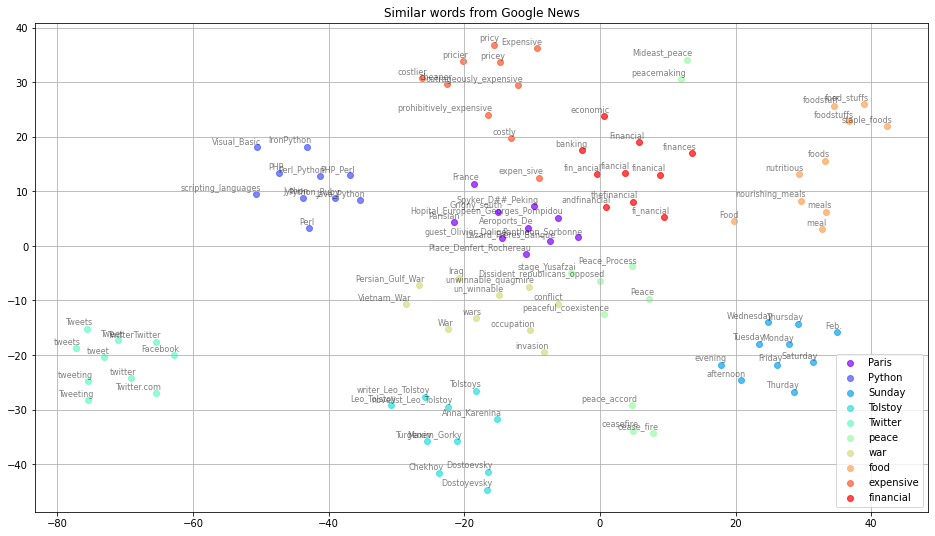

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

**Nhận xét: Các cụm được phân ra khá rõ ràng, trong đó, cụm Twitter cho thấy khoảng cách giữa các điểm thấp, nằm tách biệt so với các cụm còn lại.**